<a href="https://colab.research.google.com/github/AzurAthena/GeospatialAnalysis/blob/master/1_Working_with_maps_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install geopandas

In [19]:
import os

In [20]:
os.listdir("./")

['.config', 'drive', 'sample_data']

In [21]:
data_dir = "./drive/My Drive/Data/geospatial/data/"

In [22]:
os.listdir(data_dir)

['CA_county_median_age.csv',
 'CA_county_high_earners.csv',
 'CA_county_population.csv',
 'Philippines_AL258.kml',
 'earthquakes1970-2014.csv',
 'japan-prefecture-population.csv',
 'starbucks_locations.csv',
 'top_universities.csv',
 'purple_martin.csv',
 'NYPD_Motor_Vehicle_Collisions',
 'ghana',
 'ex4_files',
 'DEC_pointsinterest',
 'DEC_lands',
 'DEC_roadstrails',
 'crimes-in-boston',
 'kiva_loans',
 'CA_county_boundaries',
 'japan-prefecture-boundaries',
 'PhillyHealth_Air_Monitoring_Stations',
 'nyu_2451_34494',
 'NY_county_boundaries',
 'toxic_release_pennsylvania',
 'Plate_Boundaries',
 'SAPA_Aug2019-shapefile',
 'Police_Districts']

In [24]:
import geopandas as gpd

In [25]:
lands_data = gpd.read_file(data_dir + "DEC_lands/DEC_lands/DEC_lands.shp")

In [26]:
lands_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [27]:
lands_data.dtypes

OBJECTID         int64
CATEGORY        object
UNIT            object
FACILITY        object
CLASS           object
UMP             object
DESCRIPTIO      object
REGION           int64
COUNTY          object
URL             object
SOURCE          object
UPDATE_         object
OFFICE          object
ACRES          float64
LANDS_UID        int64
GREENCERT       object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [28]:
type(lands_data)

geopandas.geodataframe.GeoDataFrame

In [30]:
# select only desired columns
lands_data = lands_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [31]:
lands_data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [32]:
# how many lands of each type are there?
lands_data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [35]:
# select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = lands_data.loc[lands_data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


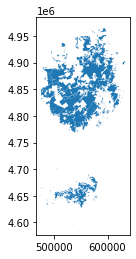

In [36]:
# plot the map
wild_lands.plot()

# Every GeoDataFrame contains a special "geometry" column. 
# It contains all of the geometric objects that are displayed when we call 
# the plot() method.


In [37]:
# Geometry column can contain a variety of different datatypes, 
# each entry will typically be a Point, LineString, or Polygon.

In [38]:
# load different types of data

In [39]:
# Campsites in New York state (Point)
POI_data = gpd.read_file(data_dir + "DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file(data_dir + "DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file(data_dir + "NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

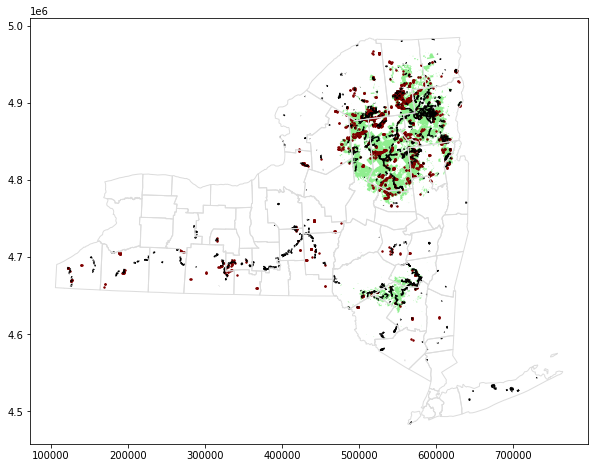

In [40]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

